# Student University Admissions Prediction by Group 8, Batch B

### About The Dataset

This dataset includes various information like GRE score, TOEFL score, university rating, SOP (Statement of Purpose), LOR (Letter of Recommendation), CGPA, research and chance of admit. In this dataset, 400 entries are included.

1. Serial No. - The ID of each invidual student.
2. GRE Score - Graduate Record Examination score out of 340 
3. TOEFL Score - Test of English as a Foreign Language score out of 120 
4. University Rating - out of 5 
5. SOP - Statement of Purpose - out of 5
6. LOR Letter of Recommendation , out of 5 
7. CGPA -  Cumulative Grade Point Average, Undergraduate GPA, out of 10 
8. Research - Experience,  either 0 or 1 
9. Chance of Admit - ranging from 0 to 1 

source : https://www.kaggle.com/datasets/akshaydattatraykhare/data-for-admission-in-the-university

### Overview
This project entails us building models that can predict with high accuracy and low error an individual's of being admitted into University. we will go through different models that fit the dataset given and evaluate the models to get the best of the three models that would predict with high accuracy and low error. the three models we are going to be examining include:
linear regression
Decision Tree
Randomforest 

### Problem Statement 

Getting admission into the university is one of the challenges young people go through, knowing your chances of getting into the university given the requirements by the university needs to be evaluated. this project involves us using a dataset to answer the question:
What are the chances of a student being admitted to university based on some feautures?

In [1]:
# Import Libraries

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
plt.rcParams["figure.figsize"] = [20,5]

In [2]:
# Load submissions file
admissions = pd.read_csv('adm_data.csv')
admissions.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Make a copy
df = admissions.copy()
# Look at the size
df.shape

(400, 9)

### Data Wrangling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.duplicated().sum()

0

In [6]:
# Renaming the columns
df.columns = ['serial_num', 'gre_score', 'toefl_score', 'university_rating',
              'sop', 'lor', 'cgpa_score', 'research_history', 
             'admission']

The dataset is clean and consistent.

### Exploratory Data Analysis

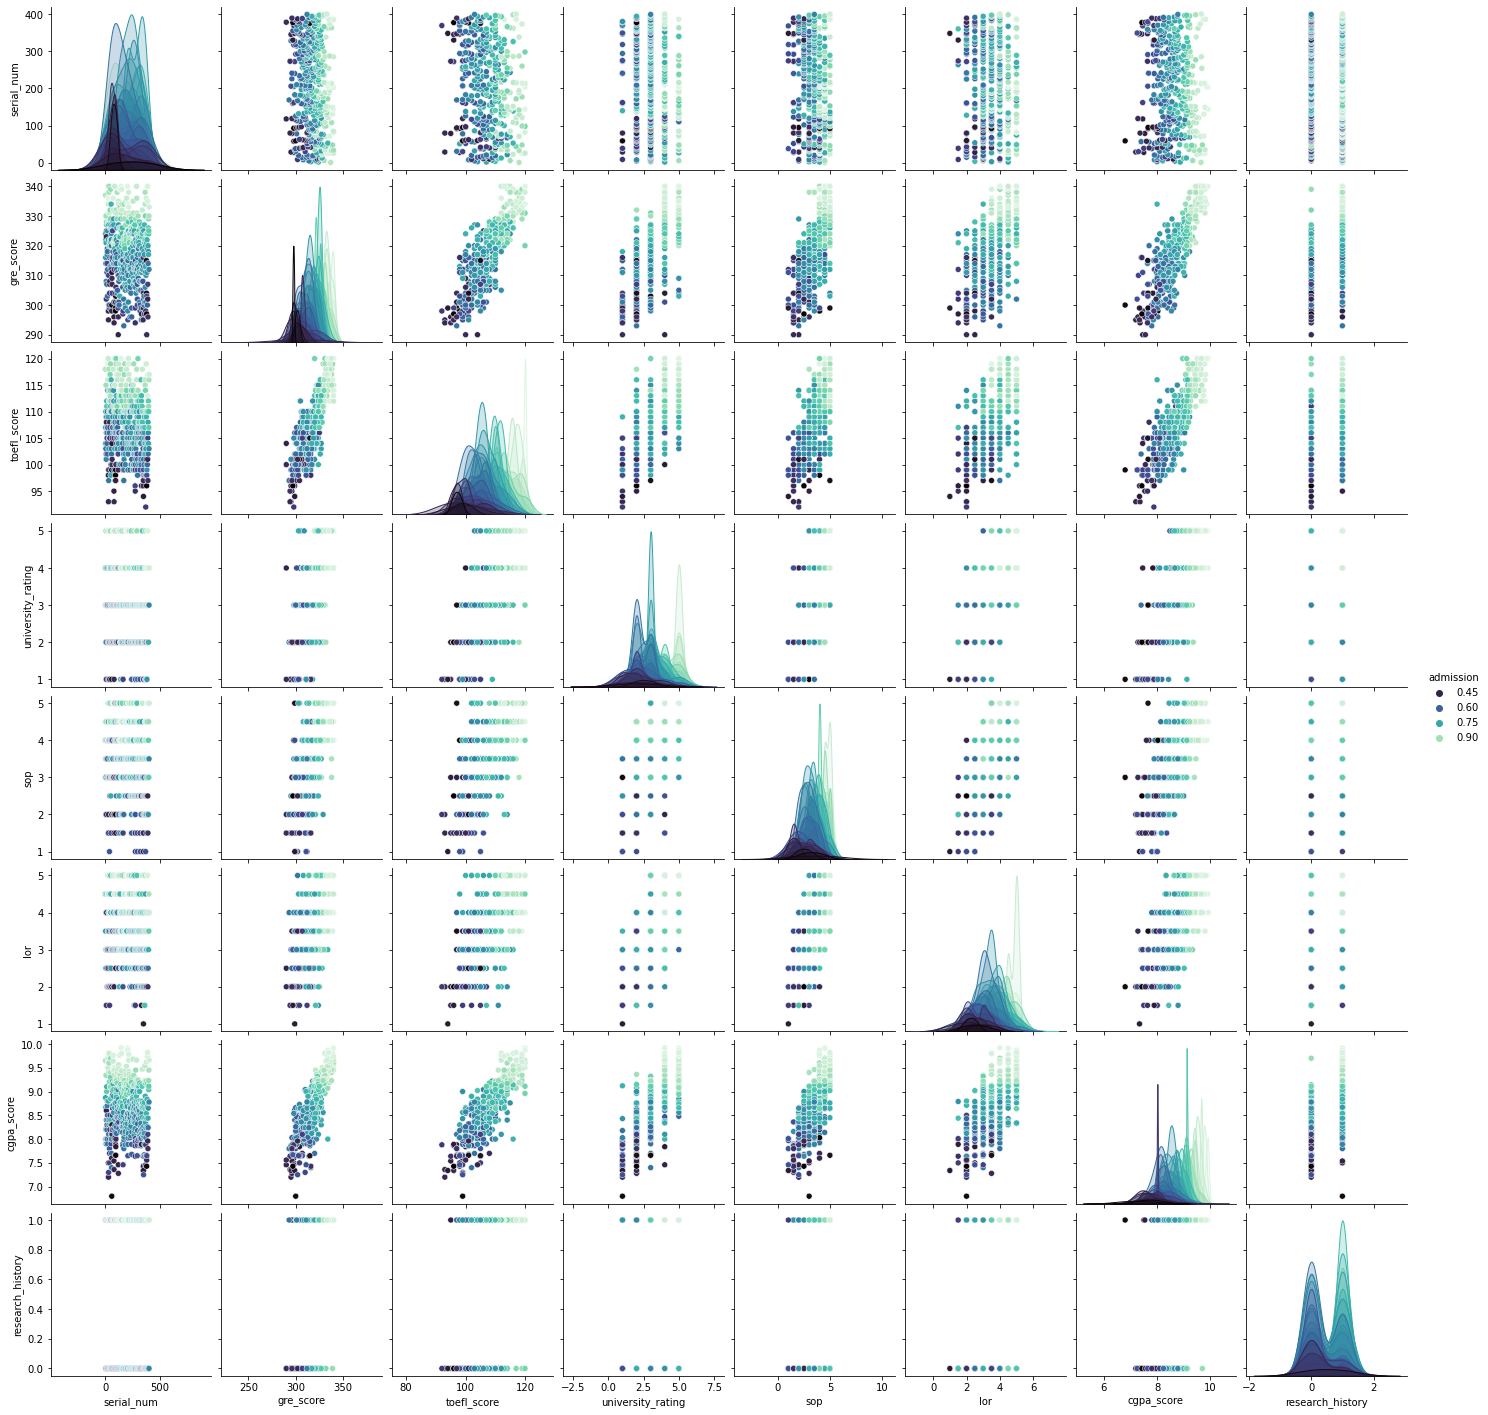

In [9]:
# Feature relations

sns.pairplot(df, hue='admission', palette='mako');

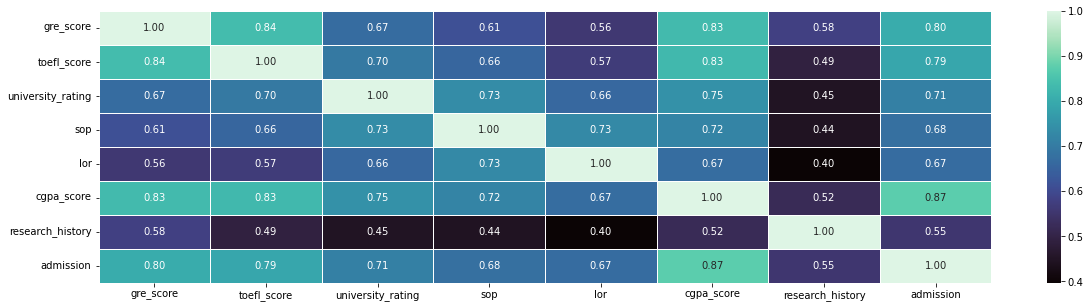

In [17]:
# heatmap to check feature correlation

sns.heatmap(df.corr(), annot=True, cmap='mako', linewidths=0.8, fmt='.2f');

All the features except `serial_num` have a medium to strong positive correlation with the target column, `admission`. 

In [18]:
df['serial_num'].value_counts().sum()

KeyError: 'serial_num'

The `Serial No.` is unique for each student and negligible relation with other features and the target, we will discard it.

In [12]:
# Drop 'serial_num'
df.drop(['serial_num'], axis=1, inplace=True) 

Since `cgpa_score` had the highest correlation value at `0.87`, we will explore it further.

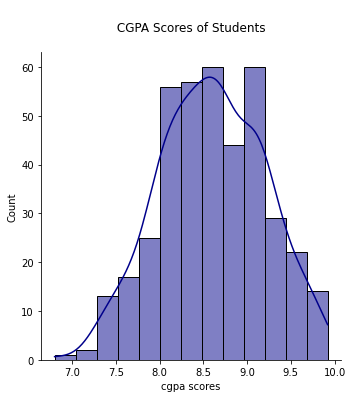

In [13]:
# Density Distribution of cgpa scores 
ax=sns.displot(df.cgpa_score, kde=True, color='darkblue')
ax.set(xlabel='cgpa scores',
      #ylabel='% Distribution',
      title='\n CGPA Scores of Students \n');

The data is somewhat normally distributed, as the mean and median are almost the same,
however the mode is different, contributing to a slightly right skew without a tail.

In [12]:
df.cgpa_score.median(), df.cgpa_score.mean(), df.cgpa_score.mode()  

(8.61,
 8.598924999999998,
 0    8.0
 Name: cgpa_score, dtype: float64)

In [13]:
# Statistical summary 
# Checking for outliers in `cgpa_score`
df.describe()['cgpa_score']

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: cgpa_score, dtype: float64

The mean, median and mode are not the same but are close to each other, 
contributing to shape of the graph being almost normally distributed,
 however looking at the mean and stardard deviation we see that data is not so spread out because it off by ~m0.6,
 as 75 % of the students got ~ 9 while on average the score is 8.6
 the min and max values are almost not far off from the scoring ranging.
 All of this make the graph to have a slight right skew and no real outliers.

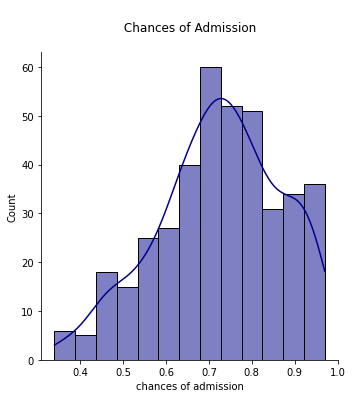

In [14]:
# Density Distribution of 'admission' 
ax=sns.displot(df.admission, kde=True, color='darkblue')
ax.set(xlabel='chances of admission',
      #ylabel='% Distribution',
      title='\n Chances of Admission \n');

In [15]:
df.admission.median(), df.admission.mean(), df.admission.mode() 

(0.73,
 0.7243499999999996,
 0    0.64
 Name: admission, dtype: float64)

In [16]:
# Statistical summary 
# Checking for outliers in `Admission`
df.describe()['admission']

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: admission, dtype: float64

In [17]:
# looking at 10 and 90% of the score data, we want values between 0.52 to 0.92
low, high = df['admission'].quantile([0.1,0.9])
low, high

(0.52, 0.92)

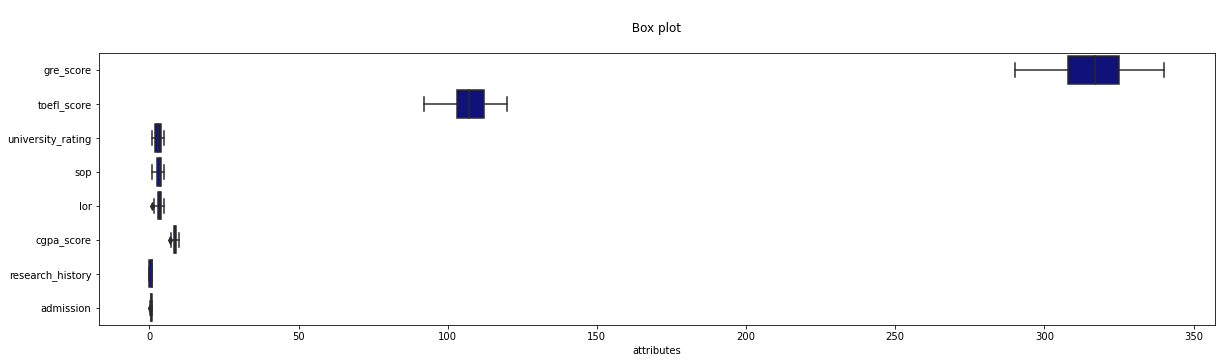

In [18]:
# Box plot to check ouliers

ax=sns.boxplot(data= df, orient='h', color='darkblue')
ax.set(xlabel='attributes',
      title='\n Box plot \n');

No significant outliers.

##### ** Note, make individual subplots of box plot to better view the viz. 

### Building the Model

In [19]:
df.head()

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history,admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df.nunique()

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa_score           168
research_history       2
admission             60
dtype: int64

#### ** Note we can standardize/scale the features because one group that nums 0-10, the other with nums up to 340

##### ** Note , all the features and the target are numbers, however the numbers are of two types discrete and continuus. 
`university_rating` and `research_history` (and `sop` and `lor`) may be taken as categories, some encoding maybe done on them.

### Model Building

In [21]:
# Split data into X and y
X = df.drop('admission', axis=1)
y = df['admission']

In [22]:
# Look at feature matrix
X

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [23]:
columns = X.columns
columns 

Index(['gre_score', 'toefl_score', 'university_rating', 'sop', 'lor',
       'cgpa_score', 'research_history'],
      dtype='object')

In [24]:
# Look at the vector
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: admission, Length: 400, dtype: float64

#### Data Preprocessing

In [25]:
# Feature Scaling with MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [26]:
# build the scaler model
scaler = StandardScaler()

In [27]:
# Fit using train set
scaler.fit(X);

In [28]:
# transform X 
X_scaled = scaler.transform(X)

In [29]:
X_scaled

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [30]:
new_df = pd.DataFrame(X_scaled, columns=[columns])
new_df

,gre_score,toefl_score,university_rating,sop,lor,cgpa_score,research_history
0,1.762107,1.746971,0.798829,1.093864,1.167321,1.764818,0.909112
1,0.627656,-0.067635,0.798829,0.596653,1.167321,0.455151,0.909112
2,-0.070467,-0.562528,-0.076600,-0.397769,0.052933,-1.005631,0.909112
3,0.453126,0.427257,-0.076600,0.099442,-1.061454,0.119339,0.909112
4,-0.244998,-0.727492,-0.952029,-1.392191,-0.504260,-0.653029,-1.099975
...,...,...,...,...,...,...,...
395,0.627656,0.427257,-0.076600,0.099442,0.052933,0.740592,0.909112
396,0.714922,-0.067635,-0.076600,-0.397769,0.052933,0.858126,0.909112
397,1.151249,1.417042,0.798829,1.591075,1.167321,1.429006,0.909112
398,-0.419528,-0.727492,-0.076600,0.099442,0.610127,0.304036,-1.099975


In [31]:
# verify min values of all feature
new_df.min(axis=0)

gre_score           -2.339367
toefl_score         -2.542098
university_rating   -1.827457
sop                 -2.386613
lor                 -2.733036
cgpa_score          -3.020504
research_history    -1.099975
dtype: float64

In [32]:
# verify max values of all features
new_df.max(axis=0)

gre_score            2.023903
toefl_score          2.076899
university_rating    1.674257
sop                  1.591075
lor                  1.724515
cgpa_score           2.218165
research_history     0.909112
dtype: float64

In [33]:
# split into train and test
from sklearn.model_selection import train_test_split

In [34]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(new_df,
                                                   y,
                                                   test_size=0.2, 
                                                   random_state=0)

#### Choosing a model

Three models we are going to try out:
* Linear Regression
* Decision Tree Regressor
* Random Forest Regressor

In [35]:
# import the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Put models in a dictionary
models = {'Linear Regression': LinearRegression(),
         'Tree': DecisionTreeRegressor(),
         'Random Forest': RandomForestRegressor(), 
         }

# Create function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    models : a dict of different regression sklearn models
    X_train : training data , no labels
    X_test : testing data, no labels
    y_train : training labels
    y_test: test labels
    '''    
    # make a dict to keep model scores
    model_scores = {}
    # loop through models
    for name, model in models.items():
        # fit model to data
        model.fit(X_train, y_train)
        # Evaluate model and append score to model_score
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

NameError: name 'LinearRegression' is not defined

In [37]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'Linear Regression': 0.7355078738145217,
 'Tree': 0.4637397341920104,
 'Random Forest': 0.6545844903196731}

from the scores gotten the following inferences can be decided
1. linear regression score of 1 depicts a perfect fit meaning that we have a highly reliable model and are sure to have
an accurate prediction. here, we have a linear regression of ~0.736 which indictes a faily good reliable model

2. the decisiontree regressor had a score of 0.44 which is really poor thus is not a good model for prediction

3. random forest score was also 0.64 which was fair and might not give us an accurate prediction

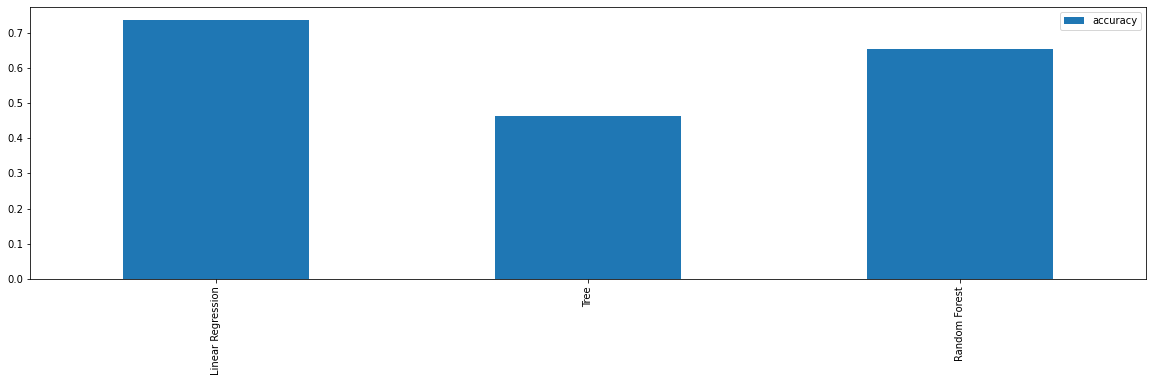

In [38]:
# visualizing the models performance
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [39]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)




LinearRegression()

In [40]:
y_PREDICT = regressor.predict(X_test)
y_PREDICT

array([0.69791327, 0.69343926, 0.77882728, 0.61577391, 0.72281999,
       0.60286273, 0.7067783 , 0.64104331, 0.87037545, 0.91874738,
       0.53830841, 0.88537227, 0.70839345, 0.45744365, 0.85464724,
       0.62329657, 0.63034415, 0.81411912, 0.58479826, 0.73198733,
       0.8755188 , 0.8436008 , 0.65964574, 0.45723204, 0.78390781,
       0.58302231, 0.49932541, 0.64153708, 0.88778116, 0.64950902,
       0.64065401, 0.74057509, 0.74268991, 0.55702869, 0.78303581,
       0.77159575, 0.65140153, 0.86244822, 0.63038997, 0.92925287,
       0.72728695, 0.67164181, 0.70967833, 0.80792068, 0.8242496 ,
       0.6540426 , 0.56311848, 0.69211512, 0.60750179, 0.60172386,
       0.67514274, 0.80138513, 0.65205933, 0.87968402, 0.72302425,
       0.75457701, 0.70602419, 0.73465988, 0.75784394, 0.82956036,
       0.77359675, 0.47343091, 0.63752277, 0.52286953, 0.84258874,
       0.82142312, 0.73664582, 0.86699812, 0.76933952, 0.75453984,
       0.59900479, 0.82915301, 0.82822468, 0.60736795, 0.93236

In [41]:
COMPARE = pd.DataFrame({'Actual':y_test, 'Predicted':y_PREDICT})
COMPARE.head(10)

,Actual,Predicted
132,0.71,0.697913
309,0.70,0.693439
341,0.79,0.778827
196,0.73,0.615774
246,0.72,0.722820
60,0.48,0.602863
155,0.77,0.706778
261,0.71,0.641043
141,0.90,0.870375
214,0.94,0.918747


<function matplotlib.pyplot.show(close=None, block=None)>

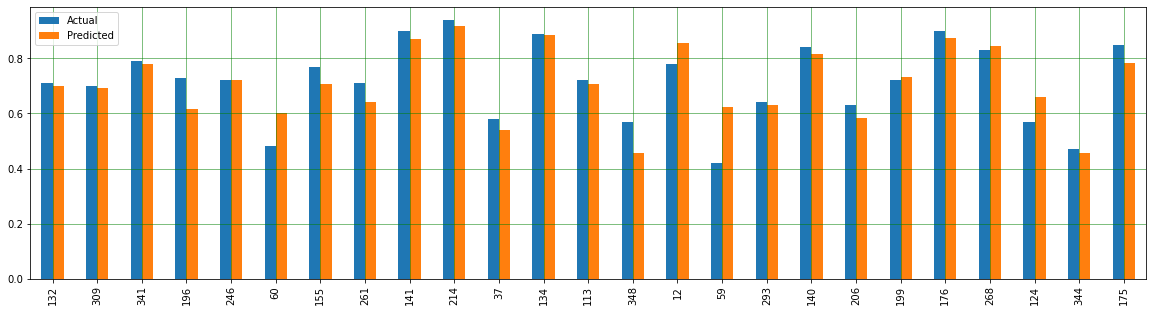

In [42]:
df1 = COMPARE.head(25)
df1.plot(kind='bar')
plt.grid(which= 'major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which= 'minor', linestyle=':', linewidth='0.5', color='black')
plt.show

In [43]:
#now to prove the point afore mention right, let us try predicting with our decision tree and compare actual vs predicted
decisiontree_model = DecisionTreeRegressor(random_state=20)
decisiontree_model.fit(X_train,y_train)
decisiontree_model.predict(X_test)
decisiontreeprediction = decisiontree_model.predict(X_test)
decisiontreeprediction


array([0.76, 0.45, 0.77, 0.67, 0.79, 0.72, 0.71, 0.73, 0.93, 0.91, 0.56,
       0.91, 0.65, 0.36, 0.89, 0.72, 0.71, 0.84, 0.65, 0.76, 0.87, 0.89,
       0.72, 0.47, 0.87, 0.65, 0.44, 0.49, 0.9 , 0.57, 0.69, 0.76, 0.84,
       0.6 , 0.82, 0.79, 0.62, 0.85, 0.53, 0.92, 0.76, 0.69, 0.78, 0.84,
       0.78, 0.65, 0.56, 0.64, 0.72, 0.64, 0.66, 0.84, 0.7 , 0.89, 0.84,
       0.7 , 0.65, 0.73, 0.76, 0.89, 0.82, 0.47, 0.71, 0.38, 0.79, 0.85,
       0.73, 0.92, 0.84, 0.79, 0.48, 0.9 , 0.91, 0.65, 0.91, 0.73, 0.59,
       0.53, 0.9 , 0.51])

In [44]:
COMPARE_DT = pd.DataFrame({'Actual':y_test, 'Predicted':decisiontreeprediction})
COMPARE_DT.head(10)

,Actual,Predicted
132,0.71,0.76
309,0.70,0.45
341,0.79,0.77
196,0.73,0.67
246,0.72,0.79
60,0.48,0.72
155,0.77,0.71
261,0.71,0.73
141,0.90,0.93
214,0.94,0.91


<function matplotlib.pyplot.show(close=None, block=None)>

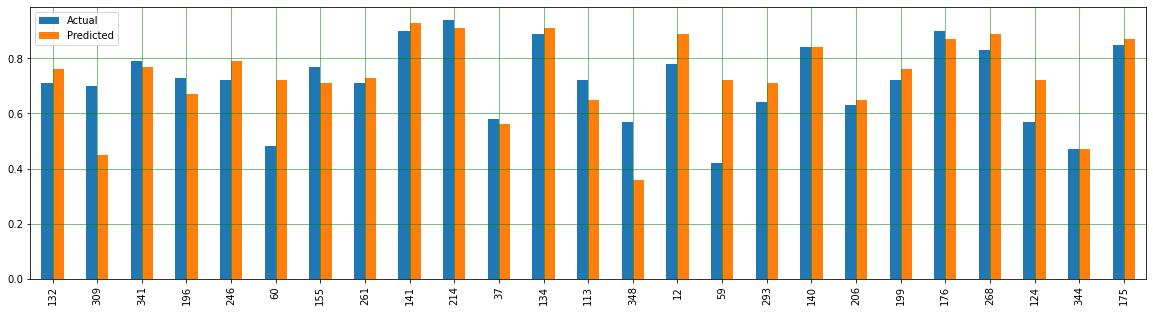

In [45]:
df1 = COMPARE_DT.head(25)
df1.plot(kind='bar')
plt.grid(which= 'major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which= 'minor', linestyle=':', linewidth='0.5', color='black')
plt.show

   > Linear Regression model out performs the others, however the performance score is not good enough therefore the model needs to be tuned to increase performance.